In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('SpaceX_f9_clean.csv')

In [3]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
1,2,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
2,3,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
3,4,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
4,5,2014-01-06,Falcon 9,3325.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0


In [4]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [5]:
df.shape

(146, 18)

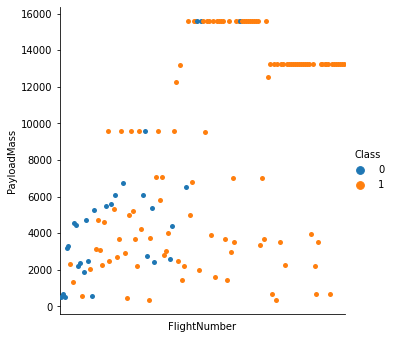

In [6]:
# Relation  between Flight Number and Payload Mass
ax = sns.catplot(data = df,x = "FlightNumber", y = "PayloadMass", hue = "Class")
for ax in ax.axes.flat:
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.set_xticks([])

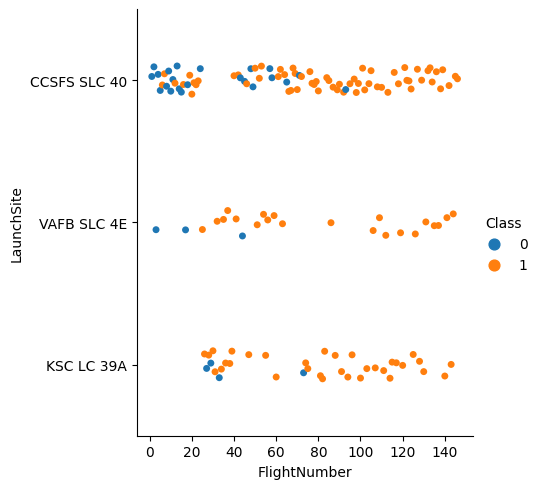

In [7]:
# Relation between Flight Number and Launch Site
sns.catplot(data  = df , x = 'FlightNumber', y = 'LaunchSite', hue = 'Class' )

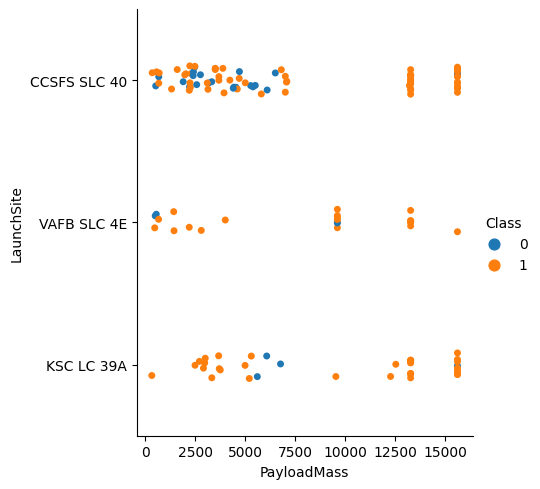

In [8]:
# Relation between Payload Mass and Launch site
sns.catplot(data=df,y="LaunchSite", x="PayloadMass", hue="Class" )

In [9]:
# Total launches to each orbit
df_orbit = df.groupby('Orbit',as_index= False)['Class'].count()
df_orbit

,Orbit,Class
0,ES-L1,1
1,GEO,1
2,GTO,31
3,HEO,1
4,ISS,24
5,LEO,7
6,MEO,5
7,PO,13
8,SSO,7
9,TLI,2


<AxesSubplot: xlabel='Orbit', ylabel='Class'>

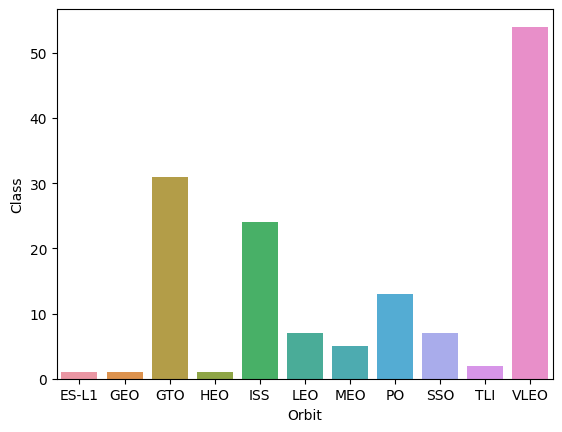

In [10]:
sns.barplot(data = df_orbit, x= 'Orbit', y = 'Class')

In [11]:
# Success rate of launch to each orbit
df_orbit_successrate = df.groupby('Orbit',as_index= False)['Class'].mean()
df_orbit_successrate

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.580645
3,HEO,1.000000
4,ISS,0.666667
5,LEO,0.857143
6,MEO,0.800000
7,PO,0.769231
8,SSO,1.000000
9,TLI,1.000000


<AxesSubplot: xlabel='Orbit', ylabel='Class'>

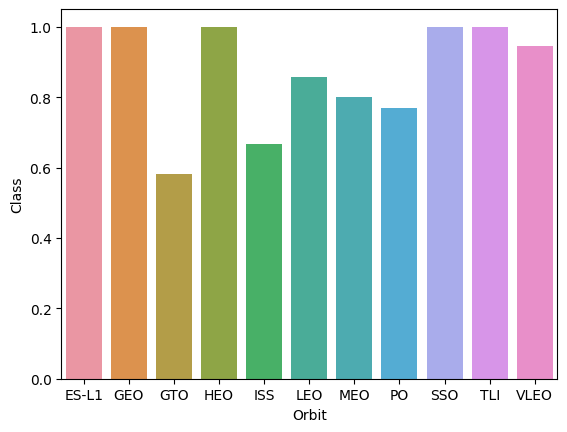

In [12]:
sns.barplot(data = df_orbit_successrate, x= 'Orbit', y = 'Class')

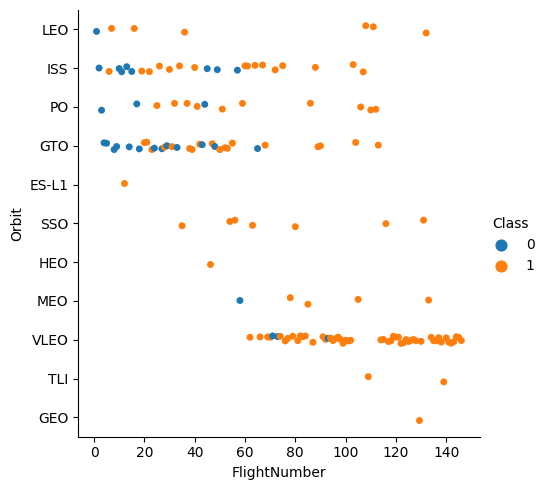

In [13]:
# Relation between Flight Number and Orbit
sns.catplot(data = df, x = 'FlightNumber', y = 'Orbit',hue= 'Class')

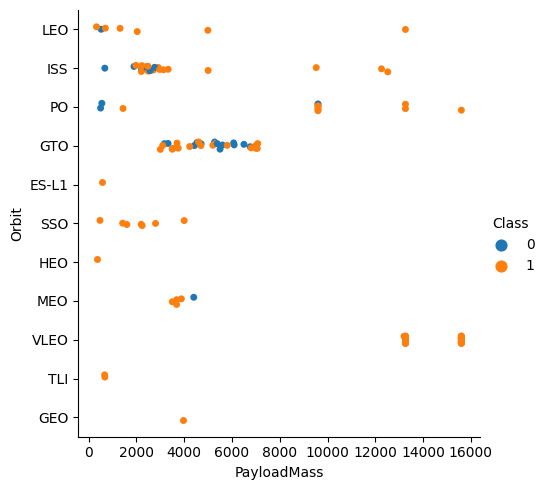

In [14]:
# Relationship between Payload Mass and Orbit
sns.catplot(data = df, x  = 'PayloadMass', y = 'Orbit', hue = 'Class')

#### Checking Success Rate of SpaceX with Time

In [15]:
year = []
for i in df['Date']:
    year.append(i.split("-")[0])

In [16]:
df_successrate = df[['Class']]

In [17]:
df_successrate['Year'] = year

C:\Users\Anant\AppData\Local\Temp/ipykernel_13876/1135796670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_successrate['Year'] = year


In [18]:
df_successrate =  df_successrate.groupby('Year', as_index = False)['Class'].mean()

In [19]:
df_successrate

,Year,Class
0,2012,0.000000
1,2013,0.000000
2,2014,0.333333
3,2015,0.333333
4,2016,0.625000
5,2017,0.823529
6,2018,0.588235
7,2019,0.900000
8,2020,0.904762
9,2021,0.958333


<AxesSubplot: xlabel='Year', ylabel='Class'>

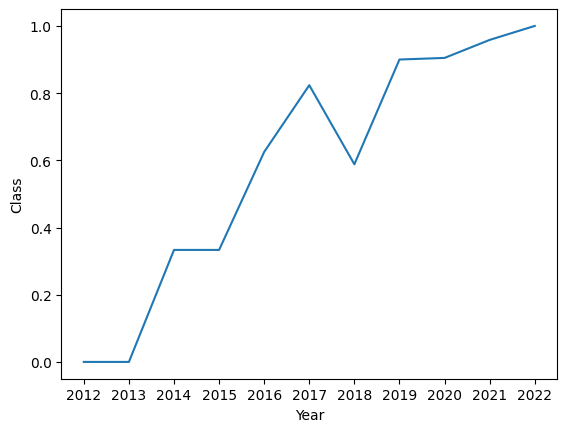

In [20]:
sns.lineplot(data = df_successrate, x = 'Year', y = 'Class')

### Feature Engineering

In [21]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [22]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
dtype: object

In [23]:
features = df[['FlightNumber', 'PayloadMass','Orbit','LaunchSite','Flights','GridFins','Reused','Legs','LandingPad','Block','ReusedCount','Serial']]
features.shape

(146, 12)

In [24]:
features_one_hot  = pd.get_dummies(data=features, columns=['Orbit', 'LaunchSite','LandingPad','Serial'])
features_one_hot.shape

(146, 87)

In [25]:
features_one_hot = features_one_hot.astype('float')

In [26]:
features_one_hot.to_csv('SpaceX_categorical_onehot.csv', index=False)

### Thank You